Evaluation of LDA Model:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
Confusion Matrix:
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]

Evaluation of Logistic Regression Model:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
Confusion Matrix:
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


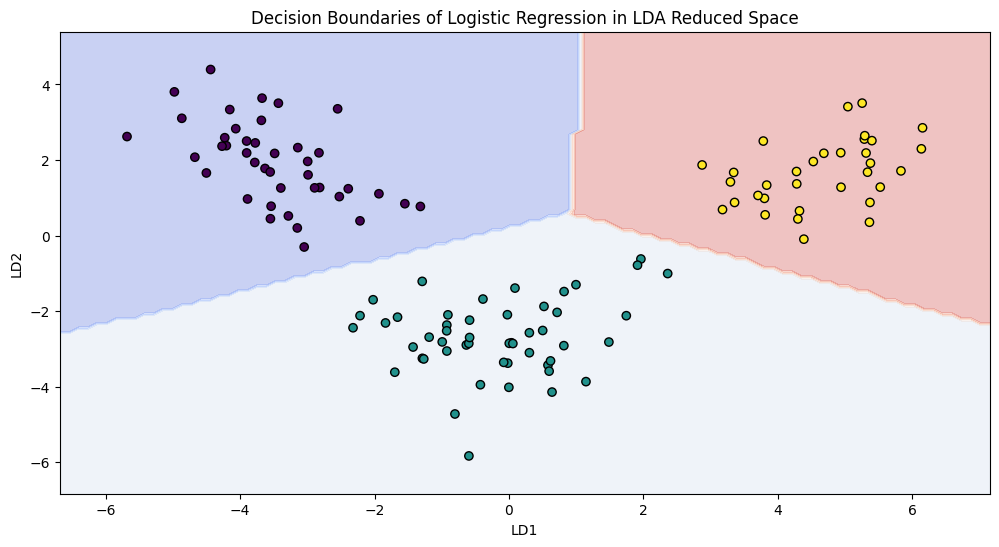

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_csv('wine.csv')
features = data.drop(columns='Wine')
targets = data['Wine']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42, stratify=targets)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_reduced = lda.fit_transform(X_train_scaled, y_train)
X_test_reduced = lda.transform(X_test_scaled)

logistic = LogisticRegression(max_iter=200)
logistic.fit(X_train_reduced, y_train)

y_pred_lda = lda.predict(X_test_scaled)
lda_accuracy = accuracy_score(y_test, y_pred_lda)
lda_precision = precision_score(y_test, y_pred_lda, average='weighted')
lda_recall = recall_score(y_test, y_pred_lda, average='weighted')
lda_conf_matrix = confusion_matrix(y_test, y_pred_lda)

print("Evaluation of LDA Model:")
print(f"Accuracy: {lda_accuracy:.2f}")
print(f"Precision: {lda_precision:.2f}")
print(f"Recall: {lda_recall:.2f}")
print("Confusion Matrix:")
print(lda_conf_matrix)

y_pred_logistic = logistic.predict(X_test_reduced)
log_accuracy = accuracy_score(y_test, y_pred_logistic)
log_precision = precision_score(y_test, y_pred_logistic, average='weighted')
log_recall = recall_score(y_test, y_pred_logistic, average='weighted')
log_conf_matrix = confusion_matrix(y_test, y_pred_logistic)

print("\nEvaluation of Logistic Regression Model:")
print(f"Accuracy: {log_accuracy:.2f}")
print(f"Precision: {log_precision:.2f}")
print(f"Recall: {log_recall:.2f}")
print("Confusion Matrix:")
print(log_conf_matrix)

xx, yy = np.meshgrid(np.linspace(X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1, 100),
                     np.linspace(X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1, 100))

grid_samples = np.c_[xx.ravel(), yy.ravel()]
Z = logistic.predict(grid_samples)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, edgecolor='k', marker='o')
plt.title('Decision Boundaries of Logistic Regression in LDA Reduced Space')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()
